Import necessary package

In [1]:
import numpy
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

Load data


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
y_train[0]

5

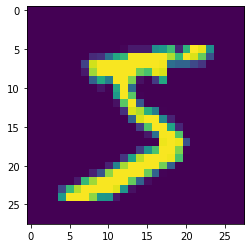

In [6]:
plt.imshow(X_train[0])

Data pre processing


In [7]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')
number_of_classes = 10


In [8]:
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)


In [9]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Create model



In [10]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation="softmax"))


In [11]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

In [12]:

model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test,Y_test))

Epoch 1/5
1875/1875 [==============================] - 209s 111ms/step - loss: 0.2373 - accuracy: 0.9528 - val_loss: 0.0800 - val_accuracy: 0.9747
Epoch 2/5
1875/1875 [==============================] - 198s 105ms/step - loss: 0.0706 - accuracy: 0.9784 - val_loss: 0.0846 - val_accuracy: 0.9752
Epoch 3/5
1875/1875 [==============================] - 195s 104ms/step - loss: 0.0484 - accuracy: 0.9851 - val_loss: 0.0874 - val_accuracy: 0.9771
Epoch 4/5
1875/1875 [==============================] - 196s 105ms/step - loss: 0.0359 - accuracy: 0.9888 - val_loss: 0.0919 - val_accuracy: 0.9779
Epoch 5/5
1875/1875 [==============================] - 195s 104ms/step - loss: 0.0292 - accuracy: 0.9912 - val_loss: 0.1064 - val_accuracy: 0.9775


Test the model

In [13]:
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)



Metrics (Test Loss & Test Accuracy): 
[0.10643840581178665, 0.9775000214576721]


In [14]:
prediction = model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 89ms/step
[[2.32846579e-14 9.17158403e-23 6.90037508e-15 7.31810099e-11
  4.10212473e-18 4.40370640e-19 9.66349185e-25 1.00000000e+00
  2.73089168e-13 1.83711661e-13]
 [9.68418488e-12 1.70741088e-09 1.00000000e+00 2.09152730e-14
  3.54427834e-16 2.11336798e-16 1.38079270e-09 1.66195792e-21
  1.10303775e-08 2.15770184e-21]
 [1.18453893e-11 1.00000000e+00 2.75740764e-09 1.34126463e-16
  2.06069490e-08 4.37439551e-09 5.86808380e-10 9.92376181e-10
  3.11978390e-08 4.28370887e-14]
 [9.99996424e-01 1.09464391e-12 2.31800234e-12 7.66664699e-14
  1.10396303e-10 1.33016170e-13 3.56359237e-06 3.39002220e-12
  3.03460881e-12 7.90741861e-10]]


In [15]:
print(numpy.argmax(prediction, axis=1))
print(Y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
